## 3. Churn

In [ ]:
import pandas as pd
import numpy as np

In [84]:
data = pd.read_csv("subscribers.csv")
data.head()

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,...,NaN,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaN,True
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,...,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,...,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,...,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,...,0.0367,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True


In [85]:
data.columns

Index(['Unnamed: 0', 'subid', 'package_type', 'num_weekly_services_utilized',
       'preferred_genre', 'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'age', 'male_TF', 'country',
       'attribution_technical', 'attribution_survey', 'op_sys',
       'months_per_bill_period', 'plan_type', 'monthly_price',
       'discount_price', 'account_creation_date', 'trial_end_date',
       'initial_credit_card_declined', 'join_fee', 'language', 'payment_type',
       'num_trial_days', 'current_sub_TF', 'payment_period', 'last_payment',
       'next_payment', 'cancel_date', 'trial_completed'],
      dtype='object')

In [86]:
data1 = data.copy()
data1 = data.drop(['Unnamed: 0','subid','language','country','months_per_bill_period','trial_end_date','next_payment','payment_type','initial_credit_card_declined','plan_type'],axis = 1)
data1.head(10)

,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,attribution_technical,attribution_survey,...,monthly_price,discount_price,account_creation_date,join_fee,num_trial_days,current_sub_TF,payment_period,last_payment,cancel_date,trial_completed
0,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,facebook,facebook,...,4.7343,4.5141,2020-01-24 21:44:16,NaN,14,True,1,2020-02-07 21:44:16,NaN,True
1,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,facebook,facebook,...,4.7343,4.5141,2020-03-01 15:44:35,0.3303,14,True,1,2020-03-15 15:44:35,NaN,True
2,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,organic,facebook,...,4.7343,4.5141,2019-12-07 16:37:06,0.1101,14,False,0,NaN,NaN,True
3,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,search,tv,...,4.7343,4.5141,2020-01-27 16:09:32,0.0367,14,False,0,NaN,NaN,True
4,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,discovery,youtube,...,4.7343,4.5141,2019-10-05 12:57:07,0.0367,14,True,2,2020-02-19 12:57:07,NaN,True
5,base,NaN,comedy,access to exclusive content,20.051667,NaN,70.0,False,bing,tv,...,4.7343,4.5141,2020-03-03 20:15:43,0.3303,14,True,1,2020-03-17 20:15:43,NaN,True
6,base,2.0,comedy,access to exclusive content,20.051667,2.0,61.0,False,bing,search,...,4.7343,4.5141,2020-02-19 18:30:15,0.3303,14,True,1,2020-03-04 18:30:15,NaN,True
7,base,3.0,drama,access to exclusive content,34.551230,2.0,23.0,False,email,referral,...,4.7343,4.5141,2020-03-05 14:52:22,0.0000,14,True,1,2020-03-19 14:52:22,NaN,True
8,base,NaN,comedy,access to exclusive content,25.851492,NaN,73.0,False,facebook,facebook,...,4.7343,4.5141,2020-02-23 17:50:25,0.6606,14,True,1,2020-03-08 17:50:25,NaN,True
9,economy,3.0,drama,replace OTT,28.751405,2.0,71.0,False,search,facebook,...,4.7343,4.5141,2020-01-21 14:17:53,0.3303,14,False,0,NaN,2020-01-27 00:00:00,False


In [104]:
data1.columns

Index(['package_type', 'num_weekly_services_utilized', 'preferred_genre',
       'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'age', 'male_TF',
       'attribution_technical', 'attribution_survey', 'op_sys',
       'monthly_price', 'discount_price', 'account_creation_date', 'join_fee',
       'num_trial_days', 'current_sub_TF', 'payment_period', 'last_payment',
       'cancel_date', 'trial_completed'],
      dtype='object')

In [105]:
data1.dropna(axis=0,subset=['package_type','intended_use','age', 'male_TF', 'attribution_survey','op_sys','join_fee'], inplace=True)

In [106]:
data1.drop(data1[data1.age > 80].index, inplace=True)
data1.drop(data1[data1.age < 15].index, inplace=True)

In [108]:
data2 = pd.get_dummies(data = data1, columns=['package_type', 'preferred_genre', 'intended_use','attribution_technical','attribution_survey','op_sys','male_TF'])
print(data2.columns)

Index(['num_weekly_services_utilized', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'age', 'monthly_price',
       'discount_price', 'account_creation_date', 'join_fee', 'num_trial_days',
       'current_sub_TF', 'payment_period', 'last_payment', 'cancel_date',
       'trial_completed', 'package_type_base', 'package_type_economy',
       'package_type_enhanced', 'preferred_genre_comedy',
       'preferred_genre_drama', 'preferred_genre_international',
       'preferred_genre_other', 'preferred_genre_regional',
       'intended_use_access to exclusive content', 'intended_use_education',
       'intended_use_expand international access',
       'intended_use_expand regional access', 'intended_use_other',
       'intended_use_replace OTT', 'intended_use_supplement OTT',
       'attribution_technical_affiliate', 'attribution_technical_appstore',
       'attribution_technical_bing', 'attribution_technical_bing_organic',
       'attribution_technical_brand sem intent bin

In [92]:
data_cleaned_dummified = data2.copy()
data_cleaned_dummified.to_csv('subscribers_cleaned_dummified.csv', index=False)
data_date = data2.copy()

In [93]:
data_date['account_creation_date'] = pd.to_datetime(data_date['account_creation_date'])
data_date['account_creation_month'] = data_date['account_creation_date'].map(lambda row: row.month)
data_date['account_creation_weekday'] = data_date['account_creation_date'].map(lambda row: row.day)

In [94]:
data_date['cancel_date'] = pd.to_datetime(data_date['cancel_date'])
data_date['cancel_month'] = data_date['cancel_date'].map(lambda row: row.month)
data_date['cancel_weekday'] = data_date['cancel_date'].map(lambda row: row.day)

In [95]:
data_date['last_payment'] = pd.to_datetime(data_date['last_payment'])
data_date['last_payment_month'] = data_date['last_payment'].map(lambda row: row.month)
data_date['last_payment_weekday'] = data_date['last_payment'].map(lambda row: row.day)

In [96]:
data_date.head()

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,monthly_price,discount_price,account_creation_date,join_fee,num_trial_days,current_sub_TF,...,op_sys_Android,op_sys_iOS,male_TF_False,male_TF_True,account_creation_month,account_creation_weekday,cancel_month,cancel_weekday,last_payment_month,last_payment_weekday
2,3.0,36.001186,2.0,25.0,4.7343,4.5141,2019-12-07 16:37:06,0.1101,14,False,...,0,1,0,1,12,7,NaN,NaN,NaN,NaN
3,NaN,20.051667,NaN,30.0,4.7343,4.5141,2020-01-27 16:09:32,0.0367,14,False,...,1,0,1,0,1,27,NaN,NaN,NaN,NaN
4,4.0,22.951579,3.0,28.0,4.7343,4.5141,2019-10-05 12:57:07,0.0367,14,True,...,0,1,1,0,10,5,NaN,NaN,2.0,19.0
6,2.0,20.051667,2.0,61.0,4.7343,4.5141,2020-02-19 18:30:15,0.3303,14,True,...,1,0,1,0,2,19,NaN,NaN,3.0,4.0
7,3.0,34.551230,2.0,23.0,4.7343,4.5141,2020-03-05 14:52:22,0.0000,14,True,...,0,1,1,0,3,5,NaN,NaN,3.0,19.0


In [97]:
subs_dum_date = data_date.copy()
subs_dum_date.to_csv('subs_dum_date.csv', index=False)

In [98]:
churn_df = subs_dum_date

In [126]:
churn_df1 = churn_df.copy()
churn_df1.shape

(143680, 88)

In [127]:
churn_df1['churn'] = 0

In [128]:
churn_df1.loc[(churn_df1['payment_period'] > 0) & (churn_df1['cancel_date'].isnull()==False) & (churn_df1['current_sub_TF'] == 0), 'churn'] = 1
churn_df1.head()

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,monthly_price,discount_price,account_creation_date,join_fee,num_trial_days,current_sub_TF,...,op_sys_iOS,male_TF_False,male_TF_True,account_creation_month,account_creation_weekday,cancel_month,cancel_weekday,last_payment_month,last_payment_weekday,churn
2,3.0,36.001186,2.0,25.0,4.7343,4.5141,2019-12-07 16:37:06,0.1101,14,False,...,1,0,1,12,7,NaN,NaN,NaN,NaN,0
3,NaN,20.051667,NaN,30.0,4.7343,4.5141,2020-01-27 16:09:32,0.0367,14,False,...,0,1,0,1,27,NaN,NaN,NaN,NaN,0
4,4.0,22.951579,3.0,28.0,4.7343,4.5141,2019-10-05 12:57:07,0.0367,14,True,...,1,1,0,10,5,NaN,NaN,2.0,19.0,0
6,2.0,20.051667,2.0,61.0,4.7343,4.5141,2020-02-19 18:30:15,0.3303,14,True,...,0,1,0,2,19,NaN,NaN,3.0,4.0,0
7,3.0,34.551230,2.0,23.0,4.7343,4.5141,2020-03-05 14:52:22,0.0000,14,True,...,1,1,0,3,5,NaN,NaN,3.0,19.0,0


In [129]:
churn_df1.loc[(churn_df1['payment_period'] == 0) & (churn_df1['trial_completed'] == 1) & (churn_df1['current_sub_TF'] == 0), 'churn'] = 1
churn_df1.head()

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,monthly_price,discount_price,account_creation_date,join_fee,num_trial_days,current_sub_TF,...,op_sys_iOS,male_TF_False,male_TF_True,account_creation_month,account_creation_weekday,cancel_month,cancel_weekday,last_payment_month,last_payment_weekday,churn
2,3.0,36.001186,2.0,25.0,4.7343,4.5141,2019-12-07 16:37:06,0.1101,14,False,...,1,0,1,12,7,NaN,NaN,NaN,NaN,1
3,NaN,20.051667,NaN,30.0,4.7343,4.5141,2020-01-27 16:09:32,0.0367,14,False,...,0,1,0,1,27,NaN,NaN,NaN,NaN,1
4,4.0,22.951579,3.0,28.0,4.7343,4.5141,2019-10-05 12:57:07,0.0367,14,True,...,1,1,0,10,5,NaN,NaN,2.0,19.0,0
6,2.0,20.051667,2.0,61.0,4.7343,4.5141,2020-02-19 18:30:15,0.3303,14,True,...,0,1,0,2,19,NaN,NaN,3.0,4.0,0
7,3.0,34.551230,2.0,23.0,4.7343,4.5141,2020-03-05 14:52:22,0.0000,14,True,...,1,1,0,3,5,NaN,NaN,3.0,19.0,0


In [130]:
churn_df1['churn'].value_counts()

0    107546
1     36134
Name: churn, dtype: int64

In [179]:
churn_df = churn_df1.copy()

In [180]:
churn_df.columns

Index(['num_weekly_services_utilized', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'age', 'monthly_price',
       'discount_price', 'account_creation_date', 'join_fee', 'num_trial_days',
       'current_sub_TF', 'payment_period', 'last_payment', 'cancel_date',
       'trial_completed', 'package_type_base', 'package_type_economy',
       'package_type_enhanced', 'preferred_genre_comedy',
       'preferred_genre_drama', 'preferred_genre_international',
       'preferred_genre_other', 'preferred_genre_regional',
       'intended_use_access to exclusive content', 'intended_use_education',
       'intended_use_expand international access',
       'intended_use_expand regional access', 'intended_use_other',
       'intended_use_replace OTT', 'intended_use_supplement OTT',
       'attribution_technical_affiliate', 'attribution_technical_appstore',
       'attribution_technical_bing', 'attribution_technical_bing_organic',
       'attribution_technical_brand sem intent bin

In [181]:
churn_df.isnull().sum(axis = 0)

num_weekly_services_utilized     50967
weekly_consumption_hour            320
num_ideal_streaming_services     51318
age                                  0
monthly_price                        0
                                 ...  
cancel_month                    124508
cancel_weekday                  124508
last_payment_month               52259
last_payment_weekday             52259
churn                                0
Length: 88, dtype: int64

In [182]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143680 entries, 2 to 227627
Data columns (total 88 columns):
 #   Column                                         Non-Null Count   Dtype         
---  ------                                         --------------   -----         
 0   num_weekly_services_utilized                   92713 non-null   float64       
 1   weekly_consumption_hour                        143360 non-null  float64       
 2   num_ideal_streaming_services                   92362 non-null   float64       
 3   age                                            143680 non-null  float64       
 4   monthly_price                                  143680 non-null  float64       
 5   discount_price                                 143680 non-null  float64       
 6   account_creation_date                          143680 non-null  datetime64[ns]
 7   join_fee                                       143680 non-null  float64       
 8   num_trial_days                              

In [183]:
churn_df = churn_df.drop('account_creation_date',axis = 1) 
churn_df = churn_df.drop('cancel_date',axis = 1) 
churn_df = churn_df.drop('last_payment',axis = 1) 
churn_df = churn_df.drop('monthly_price',axis = 1) 
churn_df = churn_df.drop('discount_price',axis = 1) 
churn_df = churn_df.drop('num_trial_days',axis = 1) 
churn_df = churn_df.drop('account_creation_month',axis = 1) 
churn_df = churn_df.drop('account_creation_weekday',axis = 1) 
churn_df = churn_df.drop('num_ideal_streaming_services', axis = 1)
#churn_df1 = churn_df1.drop('trial_completed', axis = 1)
#churn_df1 = churn_df1.drop('current_sub_TF', axis = 1)
churn_df = churn_df.drop('cancel_weekday', axis = 1)
churn_df = churn_df.drop('cancel_month', axis = 1)
churn_df = churn_df.drop('last_payment_month', axis = 1)
churn_df = churn_df.drop('last_payment_weekday', axis = 1)

In [184]:
churn_df.columns

Index(['num_weekly_services_utilized', 'weekly_consumption_hour', 'age',
       'join_fee', 'current_sub_TF', 'payment_period', 'trial_completed',
       'package_type_base', 'package_type_economy', 'package_type_enhanced',
       'preferred_genre_comedy', 'preferred_genre_drama',
       'preferred_genre_international', 'preferred_genre_other',
       'preferred_genre_regional', 'intended_use_access to exclusive content',
       'intended_use_education', 'intended_use_expand international access',
       'intended_use_expand regional access', 'intended_use_other',
       'intended_use_replace OTT', 'intended_use_supplement OTT',
       'attribution_technical_affiliate', 'attribution_technical_appstore',
       'attribution_technical_bing', 'attribution_technical_bing_organic',
       'attribution_technical_brand sem intent bing',
       'attribution_technical_brand sem intent google',
       'attribution_technical_content_greatist',
       'attribution_technical_criteo', 'attribution_t

In [185]:
finaldf = churn_df.copy()

from sklearn.model_selection import train_test_split
from sklearn import model_selection
finaldf = finaldf.dropna()

X = finaldf.drop(['churn'],axis=1)
y = finaldf['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.linear_model import LogisticRegression

logistic_regression= LogisticRegression(max_iter=200000)
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_pred,y_test))

In [198]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from matplotlib import pyplot as plt
import numpy as np
import copy
import math

pd.options.display.max_columns = 25

In [233]:
# ------ DEFINE FUNCTIONS -----
def apply_offers(df, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn):
    df_f = copy.deepcopy(df)

    # set offer parameters for all observations
    df_f['price_no_offer'] = base_price
    df_f.loc[df_f['churn'] == 1, 'price_no_offer'] = 0  # if the person churns they will pay 0

    # determine whether indiviudals accept offer
    df_f.loc[df_f['churn'] == 1, 'accept_offer_prob'] = acceptance_rate_churn  # those who were going to churn are less likely to want the offer than those who were going to stay
    df_f.loc[df_f['churn'] == 0, 'accept_offer_prob'] = acceptance_rate_nonchurn
    df_f['would_accept_offer_rand_draw'] = (df_f['random_draws'] < df_f['accept_offer_prob'])  # randomly select the individuals who would accept an offer based on their probability of acceptance

    # make offer under lpm predictions for select threshold
    df_f['make_offer_lpm'] = (df_f['prob_churn_lpm'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_lpm'] = (df_f['make_offer_lpm'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_lpm_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_lpm'], 'price_lpm_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    # make offer under logit predictions for select threshold
    df_f['make_offer_logit'] = (df_f['prob_churn_logit'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_logit'] = (df_f['make_offer_logit'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_logit_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_logit'], 'price_logit_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    df_impact = pd.DataFrame(index=cases, columns=['subs', 'revenue', 'lift_from_no_offer'])
    for c in cases:
        df_impact.loc[c, 'subs'] = (df_f['price_' + c] > 0).sum()
        df_impact.loc[c, 'revenue'] = df_f['price_' + c].sum()
    for c in cases:
        df_impact.loc[c, 'lift_from_no_offer'] = df_impact.loc[c, 'revenue'] / df_impact.loc['no_offer', 'revenue'] - 1

    return df_f, df_impact

In [234]:
def get_gini_info(actual, pred_prob):
    # format[[obs0_pred0, obs0_pred1], [obs1_pred0, obs1_pred1]]; rows (i) are observed, columns (j) are predicted
    confusion_matrix_list = list()
    for t in [x / 100 for x in range(0, 100, 33)]:
        pred = [1 if (x > t) else 0 for x in pred_prob]
        confusion_matrix_list.append(confusion_matrix(actual, pred))
        # confusion_matrix_list.append(model.pred_table(threshold=t))

    # create Gini coefficient plots
    false_positives = list()
    true_positives = list()
    for t in confusion_matrix_list:
        true_positives.append(t[1, 1])
        false_positives.append(t[0, 1])

    return confusion_matrix_list, false_positives, true_positives

In [299]:
finaldf["churn"].value_counts()

0    69517
1    22994
Name: churn, dtype: int64

In [205]:
df_train, df_test = model_selection.train_test_split(finaldf, test_size=0.3)

In [217]:
y_col_name = 'churn' 
x_col_name = ['num_weekly_services_utilized', 'weekly_consumption_hour', 'age', 'join_fee','package_type_base', 'package_type_economy', 'package_type_enhanced','preferred_genre_comedy', 'preferred_genre_drama','preferred_genre_international', 'preferred_genre_other','preferred_genre_regional', 'intended_use_access to exclusive content']    
add_constant_TF = True

In [218]:
if add_constant_TF:
    x_col_name.append('const')
    df_train = sm.add_constant(df_train)
    df_test = sm.add_constant(df_test)

In [219]:
lpm_model = sm.OLS(endog = df_train[y_col_name], exog = df_train[x_col_name])
lpm_results = lpm_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(lpm_results.summary())


RESULTS OF LOGIT MODEL FITTING

                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     1209.
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:22:08   Log-Likelihood:                -31138.
No. Observations:               64757   AIC:                         6.230e+04
Df Residuals:                   64744   BIC:                         6.242e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [220]:
logit_model = sm.Logit(endog=df_train[y_col_name], exog=df_train[x_col_name])
logit_results = logit_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(logit_results.summary())

Optimization terminated successfully.
         Current function value: 0.457744
         Iterations 7

RESULTS OF LOGIT MODEL FITTING

                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                64757
Model:                          Logit   Df Residuals:                    64744
Method:                           MLE   Df Model:                           12
Date:                Tue, 20 Dec 2022   Pseudo R-squ.:                  0.1859
Time:                        15:22:31   Log-Likelihood:                -29642.
converged:                       True   LL-Null:                       -36413.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
num_weekly_serv

In [236]:
df_test['prob_churn_lpm'] = lpm_results.predict(df_test[x_col_name])
df_test['prob_churn_logit'] = logit_results.predict(df_test[x_col_name])

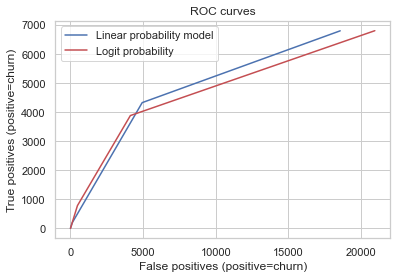

In [228]:
logit_conf_mat, logit_false_positives, logit_true_positives = get_gini_info(df_test['churn'], df_test['prob_churn_logit'])
lpm_conf_mat, lpm_false_positives, lpm_true_positives = get_gini_info(df_test['churn'], df_test['prob_churn_lpm'])

# plot ROC curves
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(lpm_false_positives, lpm_true_positives, 'b-')
ax1.plot(logit_false_positives, logit_true_positives, 'r-')
plt.title('ROC curves')
plt.xlabel('False positives (positive=churn)')
plt.ylabel('True positives (positive=churn)')
plt.legend(labels=['Linear probability model', 'Logit probability'])


In [358]:
acceptance_rate_nonchurn = 1
acceptance_rate_churn = 0.6
threshold = 0.52
base_price = 4.51
discount_amount = 0.2
cases = ['no_offer', 'lpm_offer', 'logit_offer']

In [359]:
df_test['random_draws'] = np.random.random(df_test.shape[0])

In [360]:
df_test, df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)
print(df_test, df_impact)

        const  num_weekly_services_utilized  weekly_consumption_hour   age  \
107053    1.0                           6.0                30.201361  43.0   
178386    1.0                           4.0                33.101274  25.0   
32675     1.0                           3.0                25.851492  53.0   
22019     1.0                           3.0                28.751405  35.0   
145508    1.0                           2.0                27.301448  52.0   
...       ...                           ...                      ...   ...   
226804    1.0                           2.0                22.951579  29.0   
866       1.0                           2.0                27.301448  52.0   
45803     1.0                           3.0                28.751405  48.0   
145033    1.0                           3.0                25.851492  68.0   
83791     1.0                           2.0                25.851492  41.0   

        join_fee  current_sub_TF  payment_period  trial_complet

In [348]:
df_lift_threshold = pd.DataFrame(index=range(0, 100, 1), columns=['threshold'] + cases)
for t_ind in df_lift_threshold.index:
    t_threshold = t_ind / 100
    _, t_df_impact = apply_offers(df_test, t_threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_threshold.loc[t_ind, 'threshold'] = t_threshold
    df_lift_threshold.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_threshold, t_ind

In [272]:
# test sensitivity to acceptance rate for churners
df_lift_acceptance_rate_churn = pd.DataFrame(index=range(0, 100, 1), columns=['acceptance_rate_churn'] + cases)
for t_ind in df_lift_acceptance_rate_churn.index:
    t_acceptance_rate_churn = t_ind / 100
    _, t_df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, t_acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_acceptance_rate_churn.loc[t_ind, 'acceptance_rate_churn'] = t_acceptance_rate_churn
    df_lift_acceptance_rate_churn.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_acceptance_rate_churn, t_ind


In [273]:
# test sensitivity to offer discount amount
df_lift_discount_amount = pd.DataFrame(index=range(0, 100, 1), columns=['discount_amount'] + cases)
for t_ind in df_lift_discount_amount.index:
    t_discount_amount = t_ind / 100
    _, t_df_impact = apply_offers(df_test, threshold, base_price, t_discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_discount_amount.loc[t_ind, 'discount_amount'] = t_discount_amount
    df_lift_discount_amount.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_discount_amount, t_ind


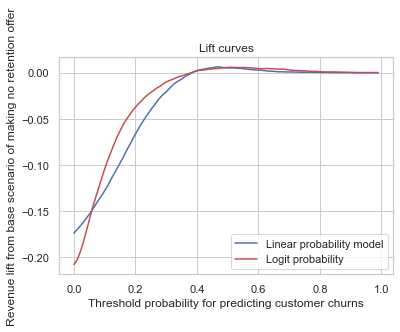

In [274]:
# figure 4
# --- plot lift curves
# Threshold sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['lpm_offer'], 'b-')
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Threshold probability for predicting customer churns')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

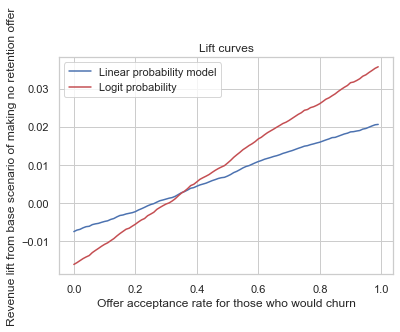

In [276]:
# Acceptance rate sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['lpm_offer'], 'b-')
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer acceptance rate for those who would churn')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

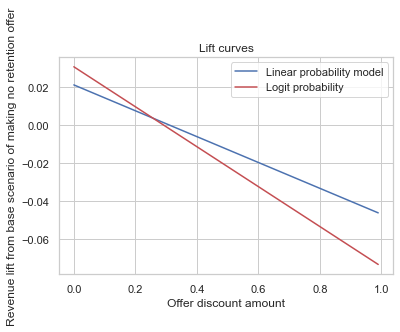

In [249]:
# Discount amount sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['lpm_offer'], 'b-')
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer discount amount')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])
plt.show()